In [ ]:
# import modules for this project
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
centers = [[2, 4], [6, 6], [1, 9]] # as defined in the given problem
n_classes = len(centers)           # provides the length of the classes
data, labels = make_blobs(n_samples=150,  # 150 samples are generated
                          centers=np.array(centers),
                          random_state=1) # ensures reproducibility


In [ ]:
print("The centers are:", centers) # printing the centers
print("The classes are:", n_classes) # printing the classes



The centers are: [[2, 4], [6, 6], [1, 9]]
The classes are: 3


In [ ]:
centers_shape = np.array(centers).shape # Defines the shape of the centers
print("Shape of centers:", centers_shape)

Shape of centers: (3, 2)


In [ ]:
print(data[:5]) # First 5 data points of the simulated data is printed

[[-0.23685338  9.87583893]
 [ 1.01652757  9.17718772]
 [ 2.55880554  9.1094027 ]
 [ 5.86355526  5.88094581]
 [ 7.12141771  6.40890054]]


In [ ]:
print(labels[:5]) # First 5 labels of the simulated data is printed

[2 2 2 1 1]


In [ ]:
# do a 80-20 split of the data

split_data = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = split_data

In [ ]:
train_data.shape # defines the shape of the training data


(120, 2)

In [ ]:
test_data.shape # defines the shape of the testing data

(30, 2)

In [ ]:
# perform a KNN analysis of the simulated data

from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

KNeighborsClassifier()

In [ ]:
# print some interested metrics
print("Predictions from the classifier:")
train_data_predicted = knn.predict(train_data)
print(train_data_predicted) # prints predictions of the `knn` model on the training data



Predictions from the classifier:
[0 0 1 0 1 1 1 1 1 0 2 0 1 1 1 1 2 1 1 1 2 2 2 2 1 0 0 0 0 2 1 1 0 1 2 2 0
 1 1 2 2 1 2 0 0 1 0 0 0 2 0 2 0 1 2 1 2 2 2 0 2 0 2 0 2 2 2 2 2 1 1 1 2 2
 0 2 1 0 1 0 0 0 2 1 0 1 0 0 1 0 0 2 1 2 2 2 0 2 2 1 2 1 1 1 0 2 2 0 0 2 2
 1 1 1 1 2 0 0 2 1]


In [ ]:
print("Target values of training data:")
print(train_labels)
print(accuracy_score(train_data_predicted, train_labels)) # prints the accuracy of the predictions with respect to training data

Target values of training data:
[0 0 1 0 1 1 1 1 1 0 2 0 1 1 1 1 2 1 1 1 2 2 2 2 1 0 0 0 0 2 1 1 0 1 2 2 0
 1 1 2 2 1 2 0 0 1 0 0 0 2 0 2 0 1 2 1 2 2 2 0 2 0 2 0 2 2 2 2 2 1 1 1 2 2
 0 2 1 0 1 0 0 0 2 1 0 1 0 0 1 0 0 2 1 2 2 2 0 2 2 1 2 1 1 1 0 2 2 0 0 2 2
 1 1 1 1 2 0 0 2 1]
1.0


In [ ]:
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels) # prints the accuracy of the predictions with respect to testing data using `knn` model

1.0

In [ ]:
print("Target values of testing data:")
print(test_labels)                                # prints labels of the testing data
print(accuracy_score(test_data_predicted, test_labels))  # prints the accuracy of the predictions with respect to testing data using `knn` model

Target values of testing data:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
1.0


In [ ]:
# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

In [ ]:
knn2.fit(train_data, train_labels)
train2_data_predicted = knn2.predict(train_data) # `knn2` model is built on training data
accuracy_score(train2_data_predicted, train_labels) # accuracy of the `knn2` model is printed on the training data

1.0

In [ ]:
test2_data_predicted = knn2.predict(test_data) # `knn2` model is used to predict on testing data
accuracy_score(test2_data_predicted, test_labels)  # accuracy of the `knn2` model is printed on the testing data

1.0

In [ ]:
print("Target values of training data:")
print(train_labels)                           # train data labels are printed
print(accuracy_score(train2_data_predicted, train_labels))  # accuracy of the `knn2` model is printed on the training data

Target values of training data:
[0 0 1 0 1 1 1 1 1 0 2 0 1 1 1 1 2 1 1 1 2 2 2 2 1 0 0 0 0 2 1 1 0 1 2 2 0
 1 1 2 2 1 2 0 0 1 0 0 0 2 0 2 0 1 2 1 2 2 2 0 2 0 2 0 2 2 2 2 2 1 1 1 2 2
 0 2 1 0 1 0 0 0 2 1 0 1 0 0 1 0 0 2 1 2 2 2 0 2 2 1 2 1 1 1 0 2 2 0 0 2 2
 1 1 1 1 2 0 0 2 1]
1.0


In [ ]:
print("Target values of testing data:")
print(test_labels)                            # test data labels are printed
print(accuracy_score(test2_data_predicted, test_labels))  # accuracy of the `knn2` model is printed on the testing data

Target values of testing data:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
1.0


<ipython-input-96-2fe5f7795efb>:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap='viridis', marker='x', label='Test Data', edgecolor='k')


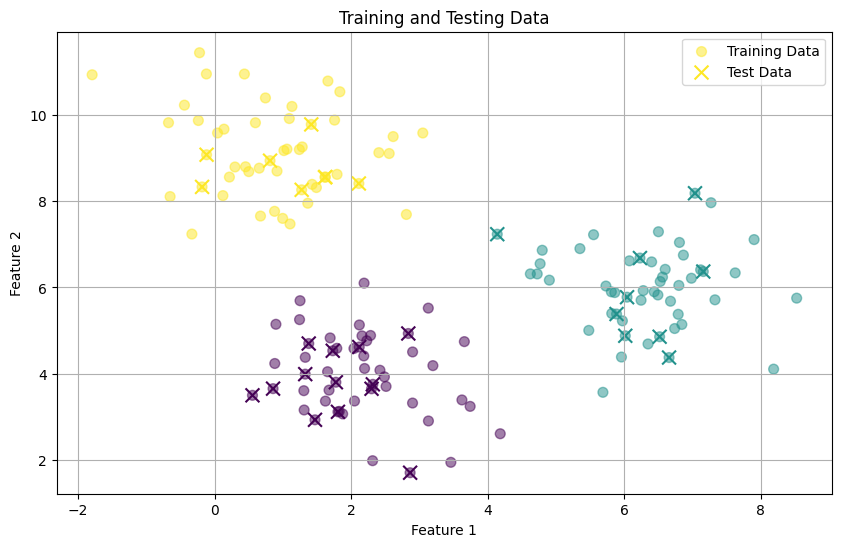

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot the training data with true labels
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis', alpha=0.5, label='Training Data')

# Plot the test data with predicted labels
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap='viridis', marker='x', label='Test Data', edgecolor='k')

plt.title('Training and Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

<ipython-input-97-7e2ec79e0dd9>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, linewidths=2, label='Test Data', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))


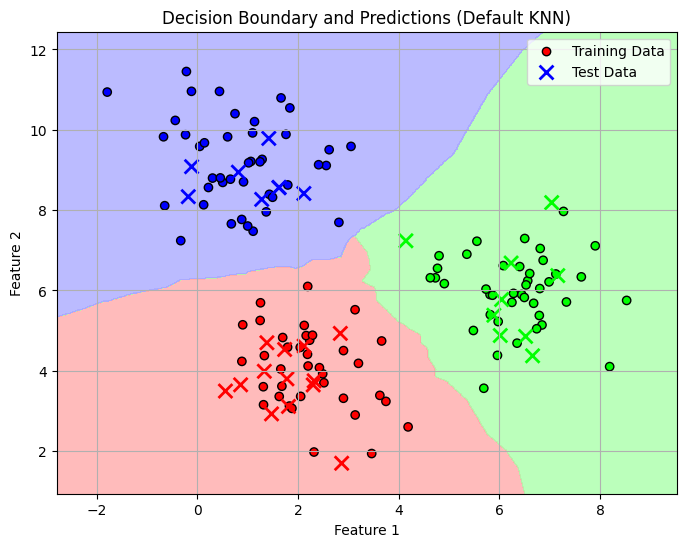

<ipython-input-97-7e2ec79e0dd9>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, linewidths=2, label='Test Data', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))


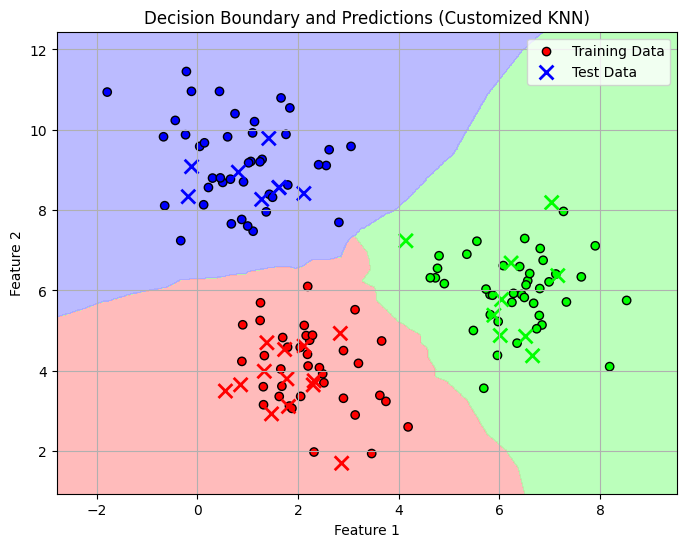

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundaries and predictions
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, title):
    # Create a meshgrid to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

    # Plot the training data
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

    # Plot the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', s=100, linewidths=2, label='Test Data', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize results for the first model (default KNN)
plot_decision_boundary(knn, train_data, train_labels, test_data, test_labels,
                       title='Decision Boundary and Predictions (Default KNN)')

# Visualize results for the second model (customized KNN)
plot_decision_boundary(knn2, train_data, train_labels, test_data, test_labels,
                       title='Decision Boundary and Predictions (Customized KNN)')